In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('covid19_tweets.csv')

In [3]:
df.shape

(485, 16)

In [4]:
df.columns

Index(['Search terms', 'City +200km radius', 'Start date', 'End date',
       'Week number', 'Number of tweets', 'Number of unique users',
       'Who's tweeting - public', 'Who's tweeting - doctors/healthcare org',
       'Who's tweeting - news', 'Who's tweeting - gov',
       'Content - virus fear/concern', 'Content - cancer treatment concern',
       'Content - change to personal cancer treatment',
       'Content - support/information',
       'Content - misc (not directly related to virus or cancer)'],
      dtype='object')

In [5]:
df.head(3)

,Search terms,City +200km radius,Start date,End date,Week number,Number of tweets,Number of unique users,Who's tweeting - public,Who's tweeting - doctors/healthcare org,Who's tweeting - news,Who's tweeting - gov,Content - virus fear/concern,Content - cancer treatment concern,Content - change to personal cancer treatment,Content - support/information,Content - misc (not directly related to virus or cancer)
0,Covid 19 AND cancer,Toronto,01-Mar-20,07-Mar-20,1,2,1,1,0,0,0,2,0,0,0,0
1,Covid 19 AND cancer,Toronto,08-Mar-20,14-Mar-20,2,1,1,1,0,0,0,0,0,0,0,1
2,Covid 19 AND cancer,Toronto,15-Mar-20,21-Mar-20,3,5,5,5,0,0,0,0,2,0,1,2


In [6]:
df.isnull().sum()

Search terms                                                0
City +200km radius                                          0
Start date                                                  0
End date                                                    0
Week number                                                 0
Number of tweets                                            0
Number of unique users                                      0
Who's tweeting - public                                     0
Who's tweeting - doctors/healthcare org                     0
Who's tweeting - news                                       0
Who's tweeting - gov                                        0
Content - virus fear/concern                                0
Content - cancer treatment concern                          0
Content - change to personal cancer treatment               0
Content - support/information                               0
Content - misc (not directly related to virus or cancer)    0
dtype: i

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 16 columns):
Search terms                                                485 non-null object
City +200km radius                                          485 non-null object
Start date                                                  485 non-null object
End date                                                    485 non-null object
Week number                                                 485 non-null int64
Number of tweets                                            485 non-null int64
Number of unique users                                      485 non-null int64
Who's tweeting - public                                     485 non-null int64
Who's tweeting - doctors/healthcare org                     485 non-null int64
Who's tweeting - news                                       485 non-null int64
Who's tweeting - gov                                        485 non-null int64
Content - virus fear/c

In [8]:
group_terms= df.groupby('Search terms')['Number of tweets'].sum()
print('Total tweets retrieved across Canada from March 1 to April 18, 2020:',np.sum(group_terms))
print('Search terms used:', df['Search terms'].unique())
print('Where tweets are from:', df['City +200km radius'].unique())

Total tweets retrieved across Canada from March 1 to April 18, 2020: 4287
Search terms used: ['Covid 19 AND cancer' 'Coronavirus AND cancer' 'Covid 19 AND oncology'
 'Coronavirus AND oncology']
Where tweets are from: ['Toronto' 'Montreal' 'Vancouver' 'Calgary' 'Edmonton' 'Ottawa']


Text(0, 0.5, 'Number of tweets')

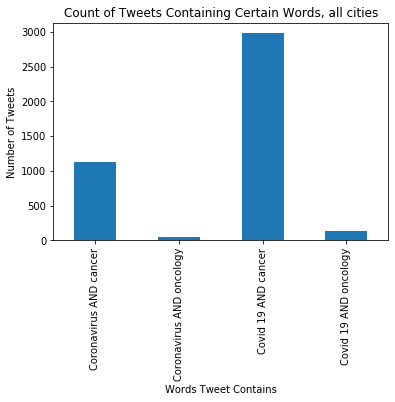

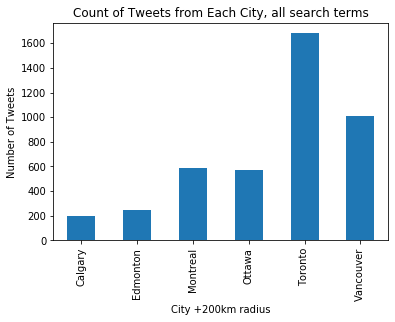

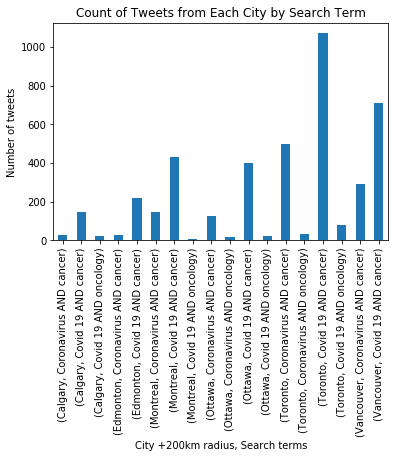

In [9]:
ax= group_terms.plot.bar(title= 'Count of Tweets Containing Certain Words, all cities')
ax.set_xlabel('Words Tweet Contains')
ax.set_ylabel('Number of Tweets')

plt.figure()
group_city= df.groupby('City +200km radius')['Number of tweets'].sum()
ax2= group_city.plot.bar(title= 'Count of Tweets from Each City, all search terms')
ax2.set_xlabel('City +200km radius')
ax2.set_ylabel('Number of Tweets')

plt.figure()
term_city= df.groupby(['City +200km radius', 'Search terms'])['Number of tweets'].sum()
ax3= term_city.plot.bar(title= 'Count of Tweets from Each City by Search Term')
ax3.set_xlabel('City +200km radius, Search terms')
ax3.set_ylabel('Number of tweets')

Number of unique Twitter users tweeting about Covid-19 and cancer: 3452


Text(0.5, 1.0, "Distribution of Who's Tweeting about Covid-19 and Cancer")

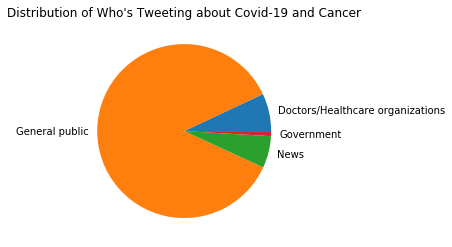

In [13]:
users= np.array([['Doctors/Healthcare organizations','General public','News','Government'],[df["Who's tweeting - doctors/healthcare org"].sum(),df["Who's tweeting - public"].sum(),df["Who's tweeting - news"].sum(),df["Who's tweeting - gov"].sum()]])

print('Number of unique Twitter users tweeting about Covid-19 and cancer:', df['Number of unique users'].sum())
plt.pie(users[1,:], labels= users[0,:], rotatelabels= False)
plt.title("Distribution of Who's Tweeting about Covid-19 and Cancer")

Text(0, 0.5, 'Number of tweets')

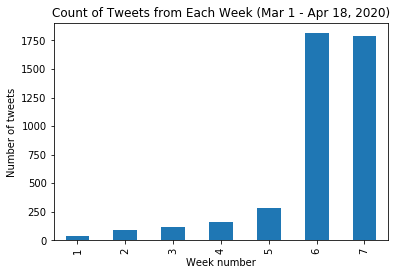

In [11]:
group_date= df.groupby('Week number')['Number of tweets'].sum()
ax_date= group_date.plot.bar(title= 'Count of Tweets from Each Week (Mar 1 - Apr 18, 2020)')
ax_date.set_ylabel('Number of tweets')

([<matplotlib.patches.Wedge at 0x25a7ca1c348>,
 [Text(0.9819485614930764, 0.495759036812924, 'Cancer concern'),
  Text(0.31359532546331365, 1.0543519203034435, 'Virus concern'),
  Text(-0.08254765416042151, 1.0968983019371539, 'Change in cancer treatment'),
  Text(-1.0897974474958991, 0.14947081130248527, 'Other'),
  Text(0.6235948187308775, -0.9061619623731754, 'Support/Info')])

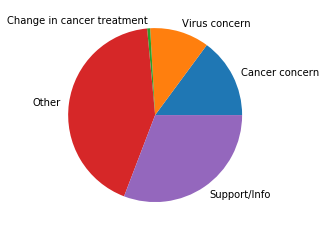

In [16]:
tweet_cont= np.array([['Cancer concern','Virus concern','Change in cancer treatment','Other','Support/Info'],[df['Content - cancer treatment concern'].sum(),df['Content - virus fear/concern'].sum(), df['Content - change to personal cancer treatment'].sum(),df['Content - misc (not directly related to virus or cancer)'].sum(),df['Content - support/information'].sum(),]])
plt.pie(tweet_cont[1,:], labels= tweet_cont[0,:], rotatelabels= False)